In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Pc\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Make plots pretty
plt.style.use("seaborn")   # classic seaborn look
sns.set_palette("pastel")

##  1️⃣ Load Dataset
### ============================================================

In [3]:
hr = pd.read_csv("D:\dataset\HR_Data_MNC_Data Science Lovers.csv")
hr

,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082
...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1999995,EMP1999996,Cody Russell,Operations,Logistics Coordinator,2010-08-31,"Casefurt, Serbia",3,14,Active,Remote,657648
1999996,1999996,EMP1999997,Tracey Smith,IT,Software Engineer,2021-05-07,"Dannyport, Kuwait",3,4,Active,On-site,1030109
1999997,1999997,EMP1999998,Tracy Lee,Sales,Business Development Manager,2024-05-29,"Craighaven, Nigeria",5,1,Active,Remote,1313085
1999998,1999998,EMP1999999,Michael Roberson,IT,Software Engineer,2023-02-14,"Jonathanmouth, Djibouti",4,2,Retired,On-site,1479727


In [4]:
# Inspect

hr.info()
hr.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 12 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   Employee_ID         object
 2   Full_Name           object
 3   Department          object
 4   Job_Title           object
 5   Hire_Date           object
 6   Location            object
 7   Performance_Rating  int64 
 8   Experience_Years    int64 
 9   Status              object
 10  Work_Mode           object
 11  Salary_INR          int64 
dtypes: int64(4), object(8)
memory usage: 183.1+ MB


,Unnamed: 0,Employee_ID,Full_Name,Department,Job_Title,Hire_Date,Location,Performance_Rating,Experience_Years,Status,Work_Mode,Salary_INR
0,0,EMP0000001,Joshua Nguyen,IT,Software Engineer,2011-08-10,"Isaacland, Denmark",5,14,Resigned,On-site,1585363
1,1,EMP0000002,Julie Williams,Marketing,SEO Specialist,2018-03-02,"Anthonyside, Costa Rica",2,7,Active,On-site,847686
2,2,EMP0000003,Alyssa Martinez,HR,HR Manager,2023-03-20,"Port Christinaport, Saudi Arabia",1,2,Active,On-site,1430084
3,3,EMP0000004,Nicholas Valdez,IT,Software Engineer,2023-10-12,"Port Shelbychester, Antigua and Barbuda",1,1,Active,On-site,990689
4,4,EMP0000005,Joel Hendricks,Operations,Logistics Coordinator,2024-12-09,"Lake Kimberly, Palestinian Territory",5,0,Active,On-site,535082


In [5]:
# Clean up

hr.drop("Unnamed: 0", axis=1, inplace=True)
hr["Hire_Date"] = pd.to_datetime(hr["Hire_Date"])

## 2️⃣ Questions & Insights
### ============================================================


> Q1) Distribution of Employee Status?

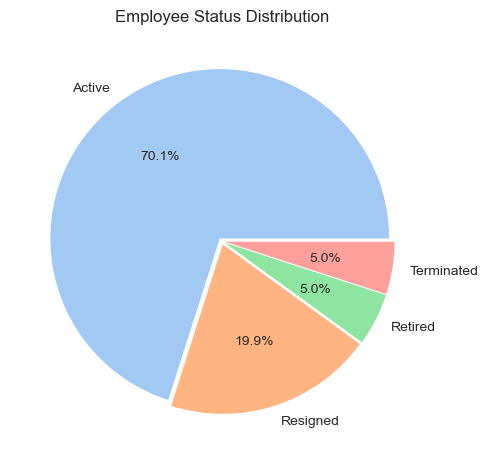

In [6]:
status = hr["Status"].value_counts()
status.plot(kind="pie", autopct='%1.1f%%', explode=[0.02]*len(status))
plt.title("Employee Status Distribution")
plt.ylabel("")
plt.show()

>Q2) Work Mode Distribution

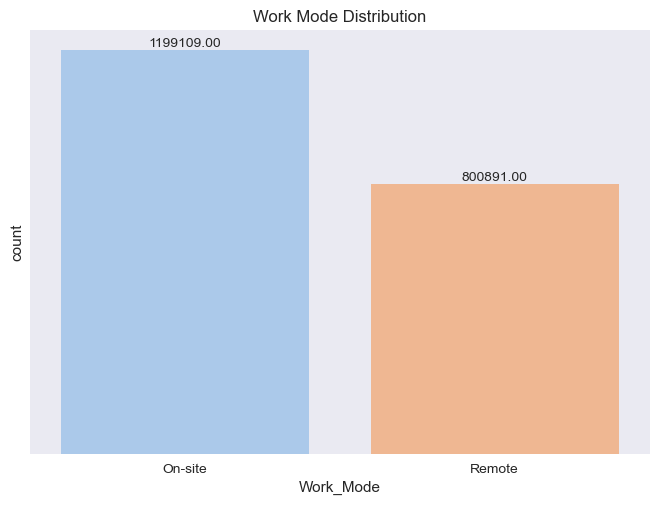

In [7]:
ax = sns.countplot(x="Work_Mode", data=hr)
ax.bar_label(ax.containers[0] , fmt = "%.2f")
plt.title("Work Mode Distribution")
plt.yticks([])
plt.show()

> Q3) Employees in each Department


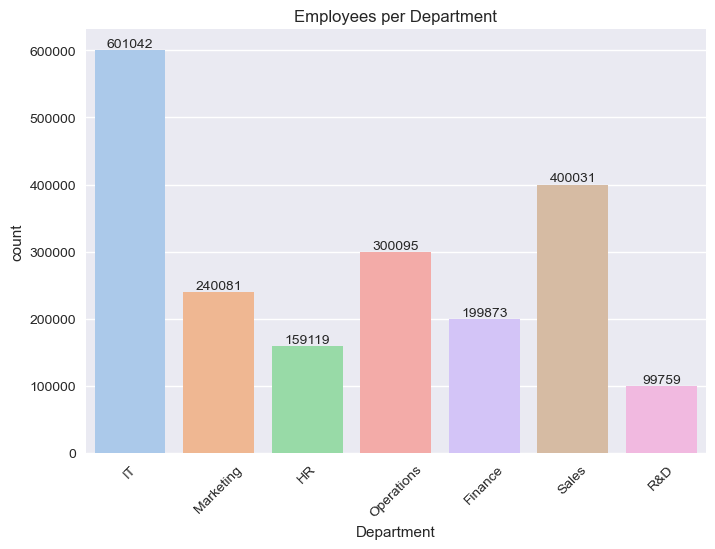

In [8]:
ax = sns.countplot(x="Department", data=hr)
ax.bar_label(ax.containers[0])
plt.title("Employees per Department")
plt.xticks(rotation=45)
plt.show()

>  Q4) Average Salary by Department


In [9]:
dept_salary = hr.groupby("Department")["Salary_INR"].mean().round(2)
dept_salary

Department
Finance        940411.74
HR             743853.56
IT            1129858.15
Marketing      769936.15
Operations     754626.25
R&D            800377.16
Sales          792957.86
Name: Salary_INR, dtype: float64

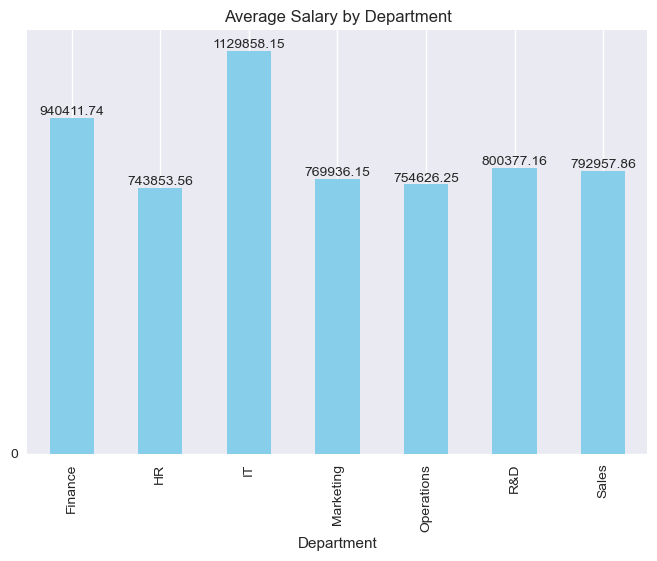

In [10]:
ax = dept_salary.plot(kind="bar", color="skyblue")
ax.bar_label(ax.containers[0] , fmt = "%.2f")
plt.title("Average Salary by Department")
plt.yticks([0])
plt.show()

>  Q5) Highest Paying Job Titles

In [11]:
job_salary = hr.groupby("Job_Title")["Salary_INR"].mean().sort_values(ascending=False).head(7).round(2)
job_salary

Job_Title
IT Manager                      2098155.78
Finance Manager                 1743241.53
HR Manager                      1252401.91
Business Development Manager    1252016.23
Software Engineer               1199260.84
Financial Analyst               1051522.90
Brand Manager                    803127.79
Name: Salary_INR, dtype: float64

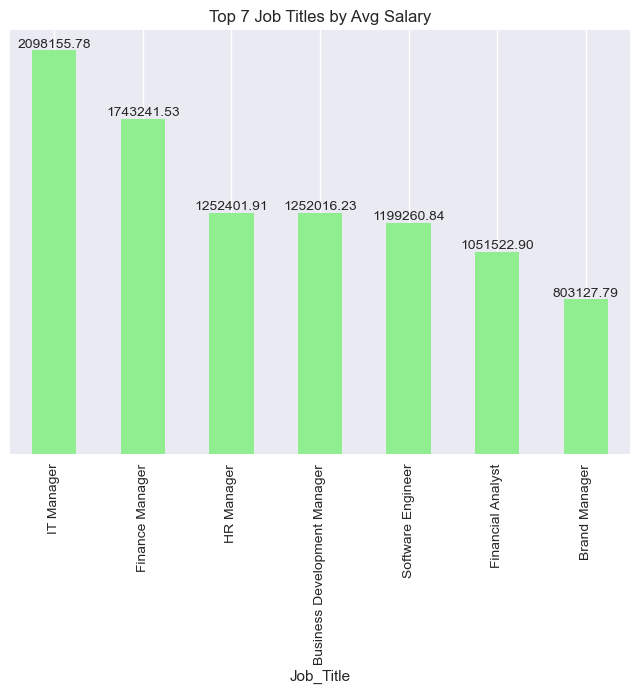

In [12]:
ax = job_salary.plot(kind="bar", color="lightgreen")
ax.bar_label(ax.containers[0] , fmt = "%.2f")
plt.title("Top 7 Job Titles by Avg Salary")
plt.yticks([])
plt.show()

>  Q6) Salary by Department & Job Title


In [13]:
# Group and calculate average salary (in '000)
dept_job = hr.groupby(['Department', 'Job_Title'])['Salary_INR'].mean().reset_index()
dept_job['Salary_INR'] = (dept_job['Salary_INR'] / 1000).round(2)
dept_job

,Department,Job_Title,Salary_INR
0,Finance,Accountant,650.08
1,Finance,CFO,795.02
2,Finance,Finance Manager,1743.24
3,Finance,Financial Analyst,1051.52
4,HR,HR Director,800.69
5,HR,HR Executive,550.55
6,HR,HR Manager,1252.40
7,HR,Talent Acquisition Specialist,801.42
8,IT,CTO,801.40
9,IT,Data Analyst,801.00


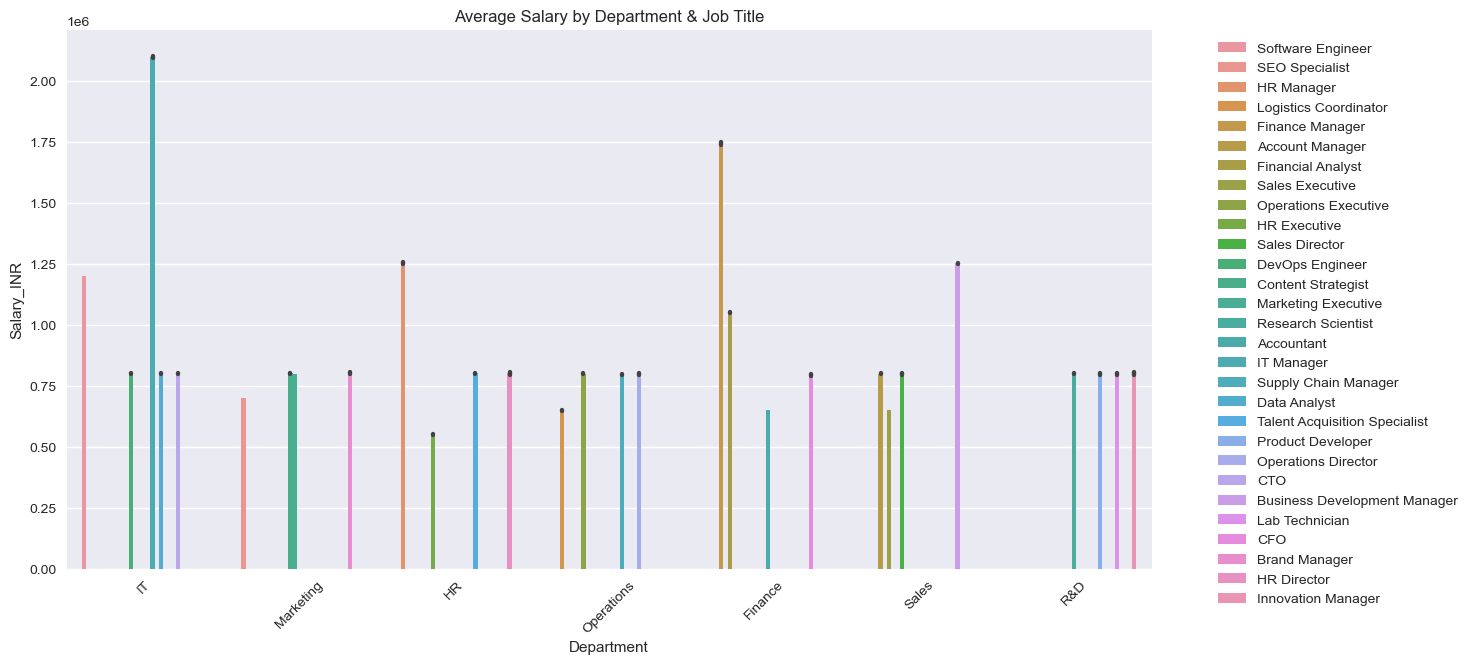

In [14]:
plt.figure(figsize=(14,7))
sns.barplot(x="Department", y="Salary_INR", hue="Job_Title", data=hr)
plt.title("Average Salary by Department & Job Title")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

> Q7) Resigned & Terminated per Department


In [15]:
resigned = hr[hr["Status"]=="Resigned"].groupby("Department")["Status"].count()
resigned

Department
Finance        40238
HR             31736
IT            119852
Marketing      47793
Operations     59397
R&D            19919
Sales          79725
Name: Status, dtype: int64

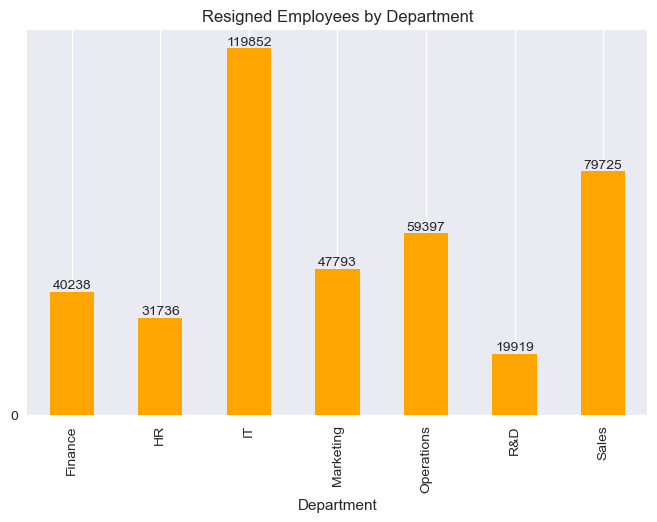

In [16]:
rg = resigned.plot(kind="bar", color="orange", figsize=(8,5), title="Resigned Employees by Department")
rg.bar_label(rg.containers[0])
plt.yticks([0])
plt.show()

In [17]:
terminated = hr[hr["Status"]=="Terminated"].groupby("Department")["Status"].count()
terminated

Department
Finance        9988
HR             7861
IT            29881
Marketing     12044
Operations    14884
R&D            4998
Sales         20214
Name: Status, dtype: int64

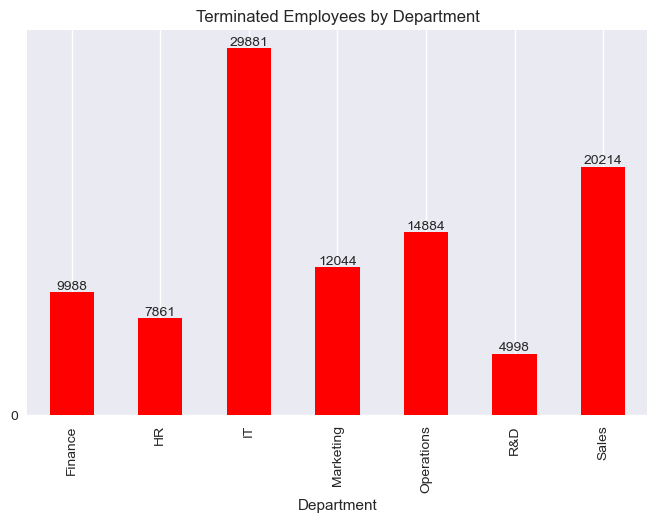

In [18]:
td = terminated.plot(kind="bar", color="red", figsize=(8,5), title="Terminated Employees by Department")
td.bar_label(td.containers[0])
plt.yticks([0])
plt.show()


> Q9) Avg Performance Rating by Department


In [19]:
rating = hr.groupby("Department")["Performance_Rating"].mean().round(3)
rating

Department
Finance       2.997
HR            2.996
IT            2.998
Marketing     3.005
Operations    2.996
R&D           3.002
Sales         3.006
Name: Performance_Rating, dtype: float64

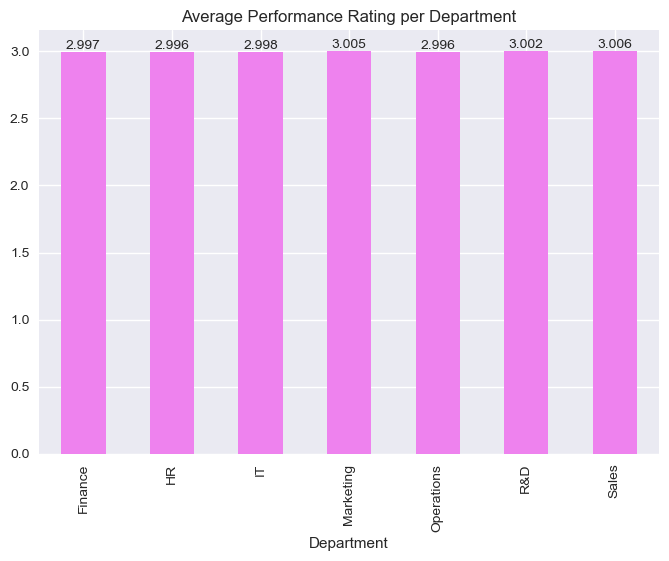

In [20]:
ax = rating.plot(kind="bar", color="violet")
ax.bar_label(ax.containers[0])
plt.title("Average Performance Rating per Department")
plt.show()

> Q10) Country with Most Employees


In [21]:

# Extract country safely from 'Location'
hr['Country'] = hr['Location'].apply(lambda x: x.split(',')[-1].strip() if pd.notnull(x) else "Unknown")

In [22]:
# Count employees by country
country_counts = hr['Country'].value_counts().head(10)
country_counts

Congo                     16286
Korea                     16285
Sri Lanka                  8409
Switzerland                8391
British Virgin Islands     8373
Iceland                    8371
New Zealand                8347
Lesotho                    8340
Peru                       8327
Malaysia                   8323
Name: Country, dtype: int64

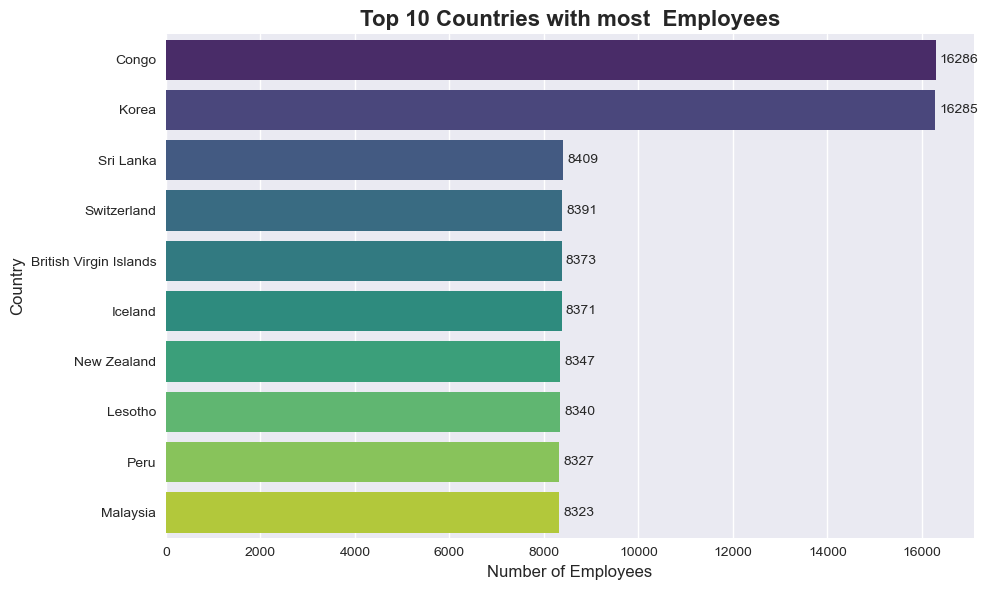

In [23]:
# Plot
plt.figure(figsize=(10,6))
ax = sns.barplot(x=country_counts.values, y=country_counts.index, palette="viridis")

# Titles & labels
plt.title("Top 10 Countries with most  Employees", fontsize=16, fontweight="bold")
plt.xlabel("Number of Employees", fontsize=12)
plt.ylabel("Country", fontsize=12)

# Add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=10, padding=3)

plt.tight_layout()
plt.show()

> Q11) Correlation between Performance & Salary


In [24]:
corr = hr[["Performance_Rating","Salary_INR"]].corr()
corr

,Performance_Rating,Salary_INR
Performance_Rating,1.000000,-0.000209
Salary_INR,-0.000209,1.000000


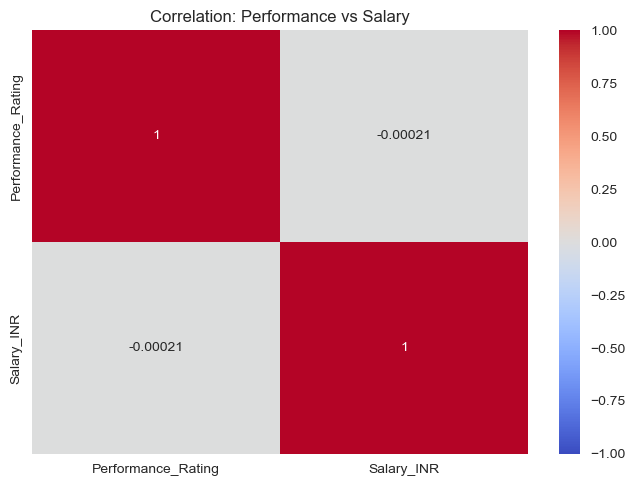

In [25]:
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation: Performance vs Salary")
plt.show()

> Q12) Hiring Trend Over Time


In [26]:
hr["Year"] = hr["Hire_Date"].dt.year
hire_trend = hr.groupby("Year")["Employee_ID"].count()
hire_trend

Year
2010     15520
2011     40089
2012     39765
2013     39988
2014     40202
2015     85984
2016    160249
2017    160363
2018    159658
2019    160202
2020    175460
2021    199366
2022    201373
2023    198982
2024    200001
2025    122798
Name: Employee_ID, dtype: int64

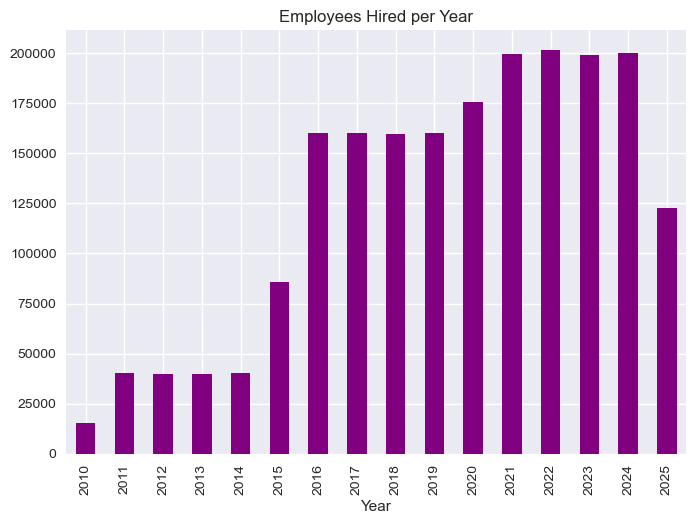

In [27]:
ax = hire_trend.plot(kind="bar", color="purple")
# ax.bar_label(ax.containers[0])
plt.title("Employees Hired per Year")
plt.show()

> Q13) Remote vs On-site Salary

In [28]:
mode_salary = hr.groupby("Work_Mode")["Salary_INR"].mean().round(2)
mode_salary

Work_Mode
On-site    896835.95
Remote     896965.33
Name: Salary_INR, dtype: float64

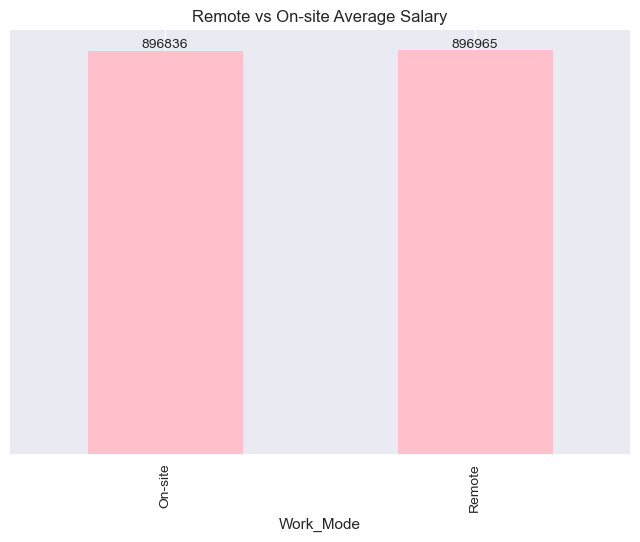

In [29]:
ax = mode_salary.plot(kind="bar", color="pink")
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.title("Remote vs On-site Average Salary")
plt.show()

>  Q14) Top 10 Highest Paid per Department


In [30]:
top_10 = hr.groupby("Department").apply(lambda x: x.nlargest(10, "Salary_INR"))
print(top_10[["Department","Job_Title","Salary_INR"]].head(30))

                   Department        Job_Title  Salary_INR
Department                                                
Finance    888712     Finance  Finance Manager     2499958
           695808     Finance  Finance Manager     2499929
           459273     Finance  Finance Manager     2499925
           750893     Finance  Finance Manager     2499813
           780290     Finance  Finance Manager     2499786
           1316795    Finance  Finance Manager     2499751
           737507     Finance  Finance Manager     2499732
           781352     Finance  Finance Manager     2499674
           803785     Finance  Finance Manager     2499629
           905337     Finance  Finance Manager     2499601
HR         223845          HR       HR Manager     1799839
           1068270         HR       HR Manager     1799791
           1541972         HR       HR Manager     1799769
           1861401         HR       HR Manager     1799759
           553718          HR       HR Manager     17997

In [31]:
print(top_10.tail(40))

                   Employee_ID           Full_Name  Department  \
Department                                                       
Marketing  1268998  EMP1268999         Shannon Fox   Marketing   
           1015129  EMP1015130         Laura Allen   Marketing   
           1214216  EMP1214217      Rebecca Davies   Marketing   
           373011   EMP0373012         Dylan Davis   Marketing   
           158254   EMP0158255          Jamie Carr   Marketing   
           1848468  EMP1848469         Lisa Warren   Marketing   
           814806   EMP0814807        Daniel Cline   Marketing   
           1117910  EMP1117911         Tyler Fritz   Marketing   
           1062763  EMP1062764         John Howard   Marketing   
           1468982  EMP1468983      Russell Parker   Marketing   
Operations 61771    EMP0061772    Rachel Rodriguez  Operations   
           1145588  EMP1145589      Daniel Ramirez  Operations   
           1219675  EMP1219676       Deborah Brown  Operations   
          

> Q15) Attrition Rate (Resigned %)


In [32]:
dept_counts = hr.groupby("Department")["Status"].agg(
    total_emp="count",
    resigned=lambda x: (x=="Resigned").sum())
dept_counts

,total_emp,resigned
Department,,
Finance,199873,40238
HR,159119,31736
IT,601042,119852
Marketing,240081,47793
Operations,300095,59397
R&D,99759,19919
Sales,400031,79725


In [33]:
dept_counts["Attrition_%"] = (dept_counts["resigned"]/dept_counts["total_emp"]*100).round(2)
print(dept_counts.sort_values("Attrition_%", ascending=False))

            total_emp  resigned  Attrition_%
Department                                  
Finance        199873     40238        20.13
R&D             99759     19919        19.97
HR             159119     31736        19.94
IT             601042    119852        19.94
Sales          400031     79725        19.93
Marketing      240081     47793        19.91
Operations     300095     59397        19.79


In [34]:
hr.to_csv("Hr_Analysis")